## Imports

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import seaborn.objects as so;
import Units
sns.set_theme()

8.741823036075946


New data imports

In [6]:
filepath = "../Data/Rust_Runs/Option2_1paramBayesian_Feb12/";

data = np.loadtxt(filepath + "test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]

AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])

#AList = np.loadtxt("./Data/2param_acc_Option2/Acceleration.txt");
#VList = np.loadtxt("./Data/2param_acc_Option2/LatticeDepth.txt");
AVIndex=datanew[:,0:2]
MomProbdata=datanew[:,4:] #may depend on file, please check
#np.savetxt(filepath + "AVIndex.txt",AVIndex)
#np.savetxt(filepath + "MomProb.txt",MomProbdata) 

#AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);
#MomProb = np.loadtxt(filepath +  "MomProb.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList
AVListIndex = AVIndex.astype(int);
MomProb = MomProbdata;

## Defining preliminary probabilities
- Define central values for acc and Lattice depth $(a_0,V_0)$ and corresponding _actual probability distirbution_ $P(p|a_0,V_0)$. .
- Import all other pairs of $(a,V)$ and their corresponding probabilitiy distributions $P(p|a,V)$ generated using the learned shaking sequence for $(a_0,V_0)$. 

In [7]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);


a0= 0.0; V0= 0.0;
P_actual= MomProb[int((AList.shape[0]-1)/2),:]
#P_actual=MomProb[250];
# This part of code is only for adding errors
epsilon = 0.0;
P_error = np.array( [ 0.00158886 ,  0.0289448  , 0.0129811 ,    0.17899  ,  0.028321,   0.0413507  ,  0.559008  , 0.0504661 ,  0.0788694  , 0.0194702 ,9.67359e-06]);

# This part of code is only for adding error terms
P_simulated=P_actual# + epsilon*P_error;

P_actual=P_actual/np.sum(P_actual);
P_simulated=P_simulated/np.sum(P_simulated);

Generate samples from the $(a_0,V_0)$ probability distribution or load from data

In [8]:
Runs=2000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);
#np.savetxt("Runs_5000.txt", outcomes)

In [8]:
Runs = 2000;
outcomes = np.loadtxt("../Data/Rust_Runs/Option2_1paramBayesian_Feb12/" + "Outcomes_2000_Run3.txt").astype(np.int64);
unique, frequency = np.unique(outcomes, return_counts = True);

Check that the generated distribution does match actual probabilities $P(p|a_0,V_0)$.

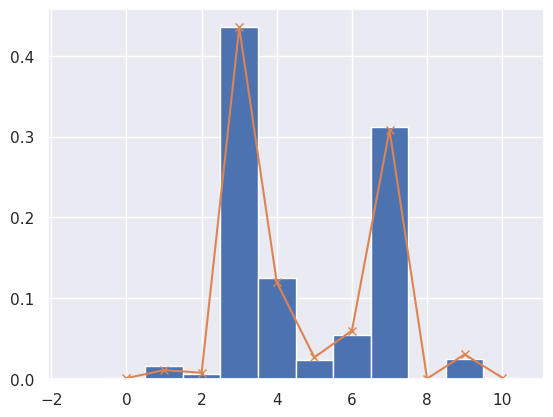

In [9]:
ax=plt.gca();
ax.hist(outcomes,  density = True,stacked = True, bins = np.arange(-1.5,11.5));
ax.plot(PossibleOutcomes, P_actual, 'x-');

## Bayesian Updating (edited to prob mean)

In [ ]:
PaVprior = np.full(AList.size,1)/(AList.size);
np.sum(PaVprior)

stdTimeprob=[];
meanTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    mean = np.dot(AList, PaVprior)#bayesian mean
    truemean= AList[int((AList.shape[0]-1)/2)]# 0.0;#true mean
    sq = np.dot (np.power(AList, 2), PaVprior)
    meanTime.append(mean);
    stdTimeprob.append(np.sqrt( sq- mean**2));# true mean or bayesian mean

## Bayesian updating for true mean

In [ ]:
PaVprior = np.full(AList.size,1)/(AList.size);
np.sum(PaVprior)

stdTimetrue=[];
meanTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    mean = np.dot(AList, PaVprior)#bayesian mean
    truemean= AList[int((AList.shape[0]-1)/2)]# 0.0;#true mean
    sq = np.dot (np.power(AList, 2), PaVprior)
    meanTime.append(mean);
    stdTimetrue.append(np.sqrt( sq- truemean**2));# true mean or bayesian mean

## Both

In [10]:
PaVprior = np.full(AList.size,1)/(AList.size);
np.sum(PaVprior)

stdTimetrue=[];
stdTimeprob=[];
meanTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 1 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    mean = np.dot(AList, PaVprior)#bayesian mean
    truemean= AList[int((AList.shape[0]-1)/2)]# 0.0;#true mean
    sq = np.dot (np.power(AList, 2), PaVprior)
    meanTime.append(mean);
    stdTimeprob.append(np.sqrt( sq- mean**2));# true mean or bayesian mean
    stdTimetrue.append(np.sqrt( sq- truemean**2));# true mean or bayesian mean

## Plotting

In [ ]:
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (4*n_p *(T/2)**2)**2
Iaa=1.701*F_MZ

In [ ]:
plt.loglog(range(1, len(outcomes)+1),np.array(stdTimeprob)*Units.accUnit/Units.g, label = "$\langle a \\rangle$")
plt.loglog(range(1, len(outcomes)+1),np.array(stdTimetrue)*Units.accUnit/Units.g, label = "$\mu=0.0$")

Iaa_norm = Iaa/((Units.accUnit/Units.g)**2)
x=np.array( range(1, len(outcomes)+1));
y= 1/np.sqrt(x*Iaa_norm)
plt.loglog(x,y, label="CR Bound")
#plt.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")
plt.xlabel("No. of Measurements $|\{m_i\}|$");
plt.ylabel("$\sigma_a (g)$")
plt.title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
plt.grid('both')
plt.legend()
#plt.savefig("stddev_prob_combined.pdf")

In [ ]:
plt.loglog(range(1, len(outcomes)+1-4000),np.array(stdTimeprob[:-4000])*Units.accUnit/Units.g, label = "$\langle a^2 \\rangle- |\langle a \\rangle|^2$")
#plt.loglog(range(1, len(outcomes)+1),np.array(stdTimetrue)*Units.accUnit/Units.g, label = "$\mu=0.0$")

Iaa_norm = Iaa/((Units.accUnit/Units.g)**2)
x=np.array( range(1, len(outcomes)+1));
y= 1/np.sqrt(x*Iaa_norm)
plt.loglog(x,y, label="CR Bound")
#plt.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")
plt.xlabel("No. of Measurements $|\{m_i\}|$");
plt.ylabel("$\sigma_a (g)$")
plt.title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
plt.grid('both')
plt.legend()
#plt.savefig("stddev_prob_combined.pdf")

In [ ]:
plt.loglog(range(1, len(outcomes)+1-4000),np.array(stdTimeprob[:-4000]), label = "$\langle a^2 \\rangle- |\langle a^2 \\rangle|^2$")
#plt.loglog(range(1, len(outcomes)+1),np.array(stdTimetrue)*Units.accUnit/Units.g, label = "$\mu=0.0$")

Iaa_norm = Iaa
x=np.array( range(1, len(outcomes)+1));
y= 1/np.sqrt(x*Iaa_norm)
plt.loglog(x,y, label="CR Bound")
#plt.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")
plt.xlabel("No. of Measurements $|\{m_i\}|$");
plt.ylabel("$\sigma_a (\omega v_r)$")
plt.title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
plt.grid('both')
plt.legend()
#plt.savefig("stddev_prob_combined.pdf")

in code units


In [ ]:
ax= plt.gca();
plotrange= [1,2,5,40, ]
for i in plotrange:
    plt.plot(AList*Units.accUnit/Units.g,plotPaV[i], 'x-',label=str(i*50),);
plt.tight_layout()
plt.xlabel("$a (g)$")
plt.ylabel("$P(a,V_0=10.0|m)$")
plt.title("$P(a,V_0=10.0|m)$ being updated with measurements")
plt.grid('both')
plt.xlim(-0.002*Units.accUnit/Units.g,0.002*Units.accUnit/Units.g)
plt.locator_params(axis='x', nbins=5) 
plt.legend(title="$|\{m_i\}|$")

#plt.savefig("zoomedinacc.pdf");
plt.show();

-0.5025644769289297 -5.967134287499819


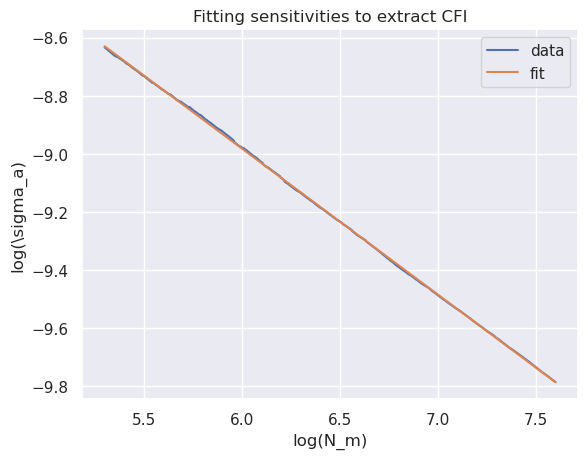

In [28]:
x = np.log(np.arange(200, len(stdTimeprob)+1))
y = np.log(np.array(stdTimeprob[ 199:]));

(m,b), (SSE,),*_ =np.polyfit(x, y, deg=1, full=True)
print(m,b)
plt.plot(x,y, label="data")

plt.plot(x,m*x+b, label="fit")
plt.xlabel('log(N_m)')
plt.ylabel("log(\sigma_a)")
plt.legend()
plt.title("Fitting sensitivities to extract CFI")
plt.grid(True)
#plt.savefig('Fitsens_probmean.pdf')


In [31]:
cfibayesian = np.exp(-2*b)
print(cfibayesian)
n_p =4; T= 32*np.pi/(2*11.5); print(T)
F_MZ = (4*n_p *T**2)**2
print(cfibayesian/F_MZ)

152400.7090830288
4.370911518037973
1.6310187827062568


In [33]:
cfibayesian/Units.Iaa

0.9588587787808681

In [ ]:
plt.plot(range(1, len(outcomes)+1),np.array(meanTime)*Units.accUnit/Units.g)
plt.plot(range(1, len(outcomes)+1), np.ones(len(outcomes))*AList[int((AList.shape[0]-1)/2)]*Units.accUnit/Units.g)

In [ ]:
plt.loglog(range(1, len(outcomes)+1),np.abs(np.array(meanTime)*Units.accUnit/Units.g))
plt.loglog(x,y, label="CR Bound")
plt.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")
plt.ylabel("$\log(|<a(g)>-\mu=0.0|)$")
plt.xlabel("$\log(N_m)$")
#plt.savefig("Residuals.pdf")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1 ,figsize=(8, 8))

ax1.loglog(range(1, len(outcomes)+1),np.array(stdTimeprob)*Units.accUnit/Units.g, label = "$\langle a \\rangle$")
ax1.loglog(range(1, len(outcomes)+1),np.array(stdTimetrue)*Units.accUnit/Units.g, label = "$\mu=0.0$")

Iaa_norm = Iaa/((Units.accUnit/Units.g)**2)
x=np.array( range(1, len(outcomes)+1));
y= 1/np.sqrt(x*Iaa_norm)
ax1.loglog(x,y, label="CR Bound")
ax1.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")


ax1.set_xlabel("No. of Measurements $|\{m_i\}|$");
ax1.set_ylabel("$\sigma_a (g)$")
ax1.set_title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
ax1.grid('both')
ax1.legend()
#plt.savefig("stddev.png")

plotrange= [1,2,5,10,40, 100]
for i in plotrange:
    ax2.plot(AList*Units.accUnit/Units.g,plotPaV[i], '-',label=str(i*50),);
ax2.set_xlabel("$a (g)$")
ax2.set_ylabel("$P(a,V_0=10.0|m)$")
ax2.set_title("$P(a,V_0=10.0|m)$ being updated with measurements")
ax2.grid('both')
ax2.set_xlim(-0.005*Units.accUnit/Units.g,0.005*Units.accUnit/Units.g)
ax2.locator_params(axis='x', nbins=5) 
ax2.legend(title="$|\{m_i\}|$")

fig.tight_layout(pad=3.0)
plt.savefig("Option2_1onlyacc_Bayesian.pdf")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1 ,figsize=(8, 8))

ax1.loglog(range(1, len(outcomes)+1-4000),np.array(stdTimeprob[:-4000]), label = "$\langle a^2 \\rangle- |\langle a \\rangle|^2$")
#ax1.loglog(range(1, len(outcomes)+1),np.array(stdTimetrue)*Units.accUnit/Units.g, label = "$\mu=0.0$")

Iaa_norm = Units.Iaa
x=np.array( range(1, len(outcomes)+1));
y= 1/np.sqrt(x*Iaa_norm)
ax1.loglog(x,y, label="CR Bound")
ax1.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")


ax1.set_xlabel("No. of Measurements $|\{m_i\}|$");
ax1.set_ylabel("$\sigma_a (\omega_r v_r)$")
ax1.set_title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
ax1.grid('both')
ax1.legend()
#plt.savefig("stddev.png")

plotrange= [1,2,5,10,40, 100]
for i in plotrange:
    ax2.plot(AList,plotPaV[i], '-',label=str(i*50),);
ax2.set_xlabel("$a (\omega_r v_r)$")
ax2.set_ylabel("$P(a,V_0=10.0|m)$")
ax2.set_title("$P(a,V_0=10.0|m)$ being updated with measurements")
ax2.grid('both')
ax2.set_xlim(-0.003,0.003)
ax2.locator_params(axis='x', nbins=5) 
ax2.legend(title="$|\{m_i\}|$")

fig.tight_layout(pad=3.0)
#plt.savefig("Option2_1onlyacc_Bayesiancodeunits.pdf")

8.741823036075946


/tmp/ipykernel_60437/3100955611.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0,2000)


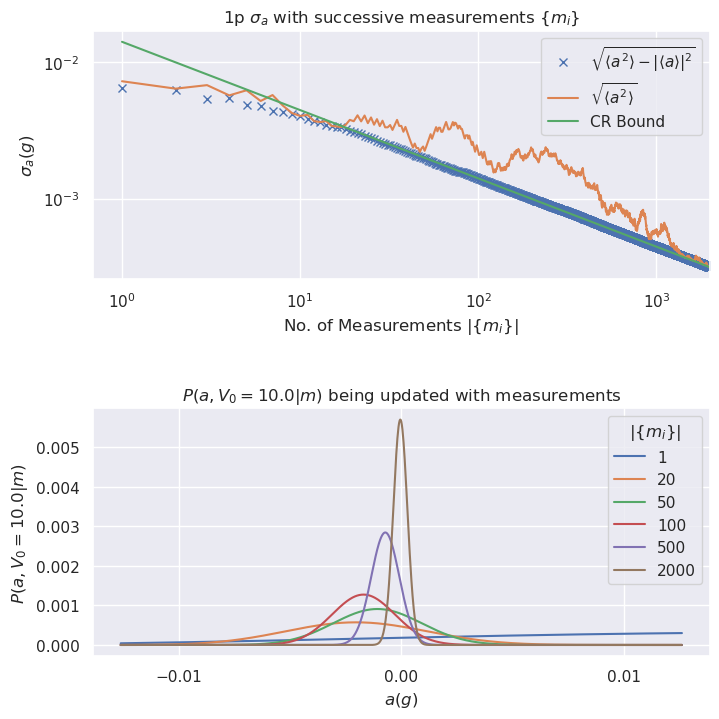

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1 ,figsize=(8, 8))

ax1.loglog(range(1, len(outcomes)+1),np.array(stdTimeprob)*Units.accUnit/Units.g, 'x',label = "$\sqrt{\langle a^2 \\rangle- |\langle a \\rangle|^2}$")
ax1.loglog(range(1, len(outcomes)+1),np.array(stdTimetrue)*Units.accUnit/Units.g, label = "$\sqrt{\langle a^2 \\rangle}$")
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (4*n_p *(T/2)**2)**2
Iaa=1.701*F_MZ

Iaa_norm = Iaa/(Units.accUnit/Units.g)**2
x=np.array( range(1, len(outcomes)+1));
y= 1/np.sqrt(x*Iaa_norm)
ax1.loglog(x,y, label="CR Bound")
#ax1.loglog(x, np.ones(len(x))*0.0005, '--',label="dyn range")
ax1.set_xlim(0,2000)

ax1.set_xlabel("No. of Measurements $|\{m_i\}|$");
ax1.set_ylabel("$\sigma_a (g)$")
ax1.set_title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
ax1.grid('both')
ax1.legend()
#plt.savefig("stddev.png")

plotrange= [1,20,50,100,500, 2000]
for i in plotrange:
    ax2.plot(AList*Units.accUnit/Units.g,plotPaV[i]*Units.g/Units.accUnit, '-',label=str(i*1),);
ax2.set_xlabel("$a (g)$")
ax2.set_ylabel("$P(a,V_0=10.0|m)$")
ax2.set_title("$P(a,V_0=10.0|m)$ being updated with measurements")
ax2.grid('both')
#ax2.set_xlim(-0.01,0.01)
ax2.locator_params(axis='x', nbins=5) 
ax2.legend(title="$|\{m_i\}|$")

fig.tight_layout(pad=3.0)
#plt.savefig("Option2_1onlyacc_Outcomes2000_Run3.pdf")

In [12]:
range = 0.01;
(2*range/1000)*Units.accUnit/Units.g

0.00011209043916457364

You should expect errors around this margin

In [34]:
range*Units.accUnit/Units.g

0.05604521958228681